In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 22.3 MB 78.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [ ]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Scaling and Fitting KMedoids**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [ ]:
y_kmed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
kMedoids.inertia_

131.87877332824286

**How to use Silhouette to evaluate cluster**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters=3, random_state=0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled,y_kmed)
print(silhouette_avg)

0.4590416105554613


In [ ]:
import numpy as np
sample_silhouette_values = silhouette_samples(x_scaled,y_kmed)
for i in range(3):
  ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
  print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


**How to use Silhouette width to find number of cluster**

In [ ]:
sw = []

for i in range(2,11):
  kMedoids = KMedoids(n_clusters=i,random_state=0)
  kMedoids.fit(x_scaled)
  y_kmed = kMedoids.fit_predict(x_scaled)
  silhouette_avg=silhouette_score(x_scaled,y_kmed)
  sw.append(silhouette_avg)

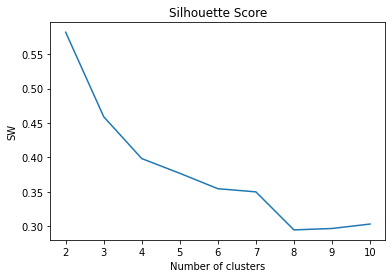

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),sw)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW') #Within cluster sum of squares
plt.show()

In [ ]:
from sklearn import metrics

def purity_score(y_true, y_pred):
  # Compute contingency metrix (also called confusion metrix)
  contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
  # Return purity
  return np.sum(np.amax(contingency_matrix,axis=0)) /np.sum(contingency_matrix)

**How Extreme values effect K - Medoid compared to K - Means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.8333333333333334

**Visualization**

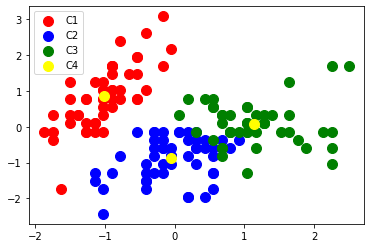

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0,0], x_scaled[y_kmeans == 0,1],s=100,c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0], x_scaled[y_kmeans == 1,1],s=100,c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0], x_scaled[y_kmeans == 2,1],s=100,c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='C4')
plt.legend()

In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3,random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

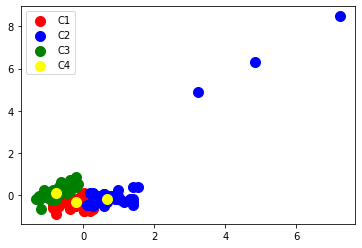

In [ ]:
plt.scatter(x_scaled[y_kmed == 0,0], x_scaled[y_kmed == 0,1],s=100,c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0], x_scaled[y_kmed == 1,1],s=100,c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0], x_scaled[y_kmed == 2,1],s=100,c='green',label='C3')
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1],s=100,c='yellow',label='C4')
plt.legend()

**Adding Extreme values**

In [ ]:
import numpy as np
m=np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]], axis = 0)
m.shape
y=np.append(y,[2,2,2])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
scaler = StandardScaler().fit(m)
x_scaled=scaler.transform(m)

In [ ]:
kmeans=KMeans(n_clusters=3,init='random',max_iter = 300,n_init =10,random_state=0)
y_kmeans=kmeans=kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.673202614379085

In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids=KMedoids(n_clusters=3,random_state=0)
y_kmed=kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.8627450980392157

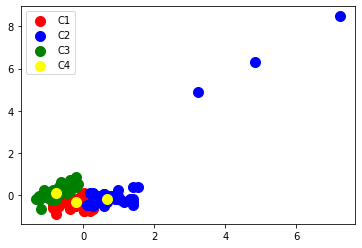

In [ ]:
plt.scatter(x_scaled[y_kmed == 0,0], x_scaled[y_kmed == 0,1],s=100,c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0], x_scaled[y_kmed == 1,1],s=100,c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0], x_scaled[y_kmed == 2,1],s=100,c='green',label='C3')
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1],s=100,c='yellow',label='C4')
plt.legend()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.673202614379085

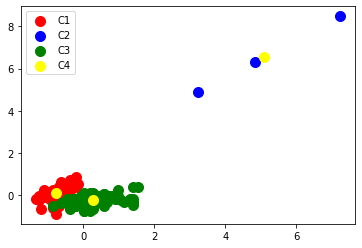

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0,0], x_scaled[y_kmeans == 0,1],s=100,c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0], x_scaled[y_kmeans == 1,1],s=100,c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0], x_scaled[y_kmeans == 2,1],s=100,c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='C4')
plt.legend()

In [ ]:
data = [['K - Means',0.81], ['K - Means With Ouliers', 0.67], ['K - Medoid',0.84],['K - Medoid with Outliers',0.71]]
df = pd.DataFrame(data, columns=['Method','Purity'])

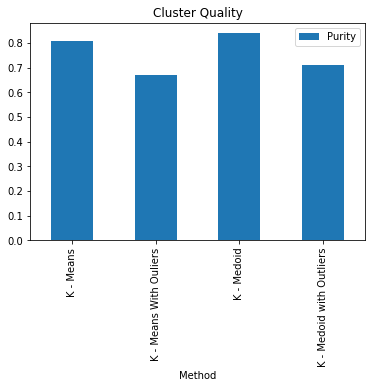

In [ ]:
df.plot.bar(x='Method',y='Purity',title='Cluster Quality')